In [1]:
import matplotlib.pyplot as plt
import pandas as pd
date_parser = pd.to_datetime

In [2]:
filename = 'data/data.csv'

In [3]:
df = pd.read_csv(filename, parse_dates=['datetime'])

In [4]:
df.head()

,lon,lat,datetime,value1,value2,value3,value4
0,32.1,33.0,2019-01-01 10:00:00,6.967786,5.398378,23.211337,0.000000
1,32.2,33.1,2019-01-01 10:30:00,4.643465,8.390913,3.486007,0.000000
2,32.3,33.2,2019-01-01 11:00:00,2.102510,4.049069,4.235325,0.000000
3,32.4,33.3,2019-01-01 11:30:00,49.288904,4.452091,0.000000,46.180565
4,32.5,33.4,2019-01-01 12:00:00,2.222479,4.608264,0.000000,26.837229


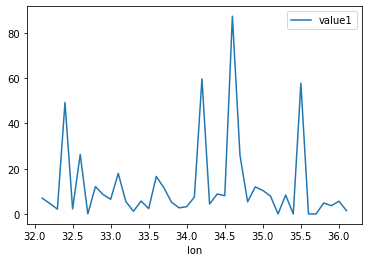

In [5]:
df[['lon', 'value1']].set_index('lon').plot()

In [6]:
df_rolled = df.set_index('datetime').rolling(5).mean()

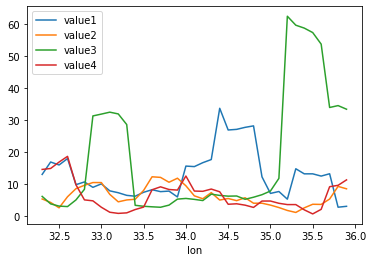

In [7]:
df_rolled[['lon', 'value1', 'value2', 'value3', 'value4']].set_index('lon').plot()

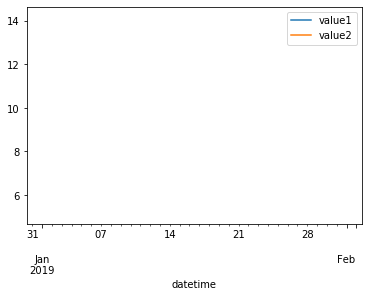

In [8]:
df_grouped = df[['datetime', 'value1', 'value2']].groupby(pd.Grouper(key='datetime', freq='d')).mean().plot()

In [9]:
dft = df.set_index('datetime')
dft.groupby(dft.index.day).mean()

,lon,lat,value1,value2,value3,value4
datetime,,,,,,
1,34.1,35.0,12.423044,6.501372,18.761311,6.784441


In [10]:
filename = 'data/data2.csv'

In [11]:
df = pd.read_csv(filename, parse_dates=['datetime'])
df.head()

,lon,lat,datetime,value1,value2,value3,value4
0,32.1,33.0,2019-01-02 01:00:00,1.166667,2.500000,3.012658,4.047619
1,32.2,33.1,2019-02-02 01:30:00,1.018868,2.036145,3.025316,4.080000
2,32.3,33.2,2019-03-02 02:00:00,1.208333,2.114286,3.000000,4.076923
3,32.4,33.3,2019-04-02 02:30:00,1.034091,2.000000,3.048193,4.028571
4,32.5,33.4,2019-05-02 03:00:00,1.011111,2.142857,3.024691,4.064516


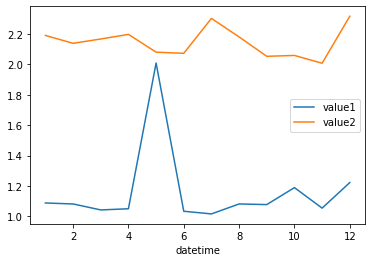

In [12]:
dft = df[['datetime', 'value1', 'value2']].set_index('datetime')
dft.groupby(dft.index.month).mean().plot()

In [13]:
bylon = df.groupby('lon')

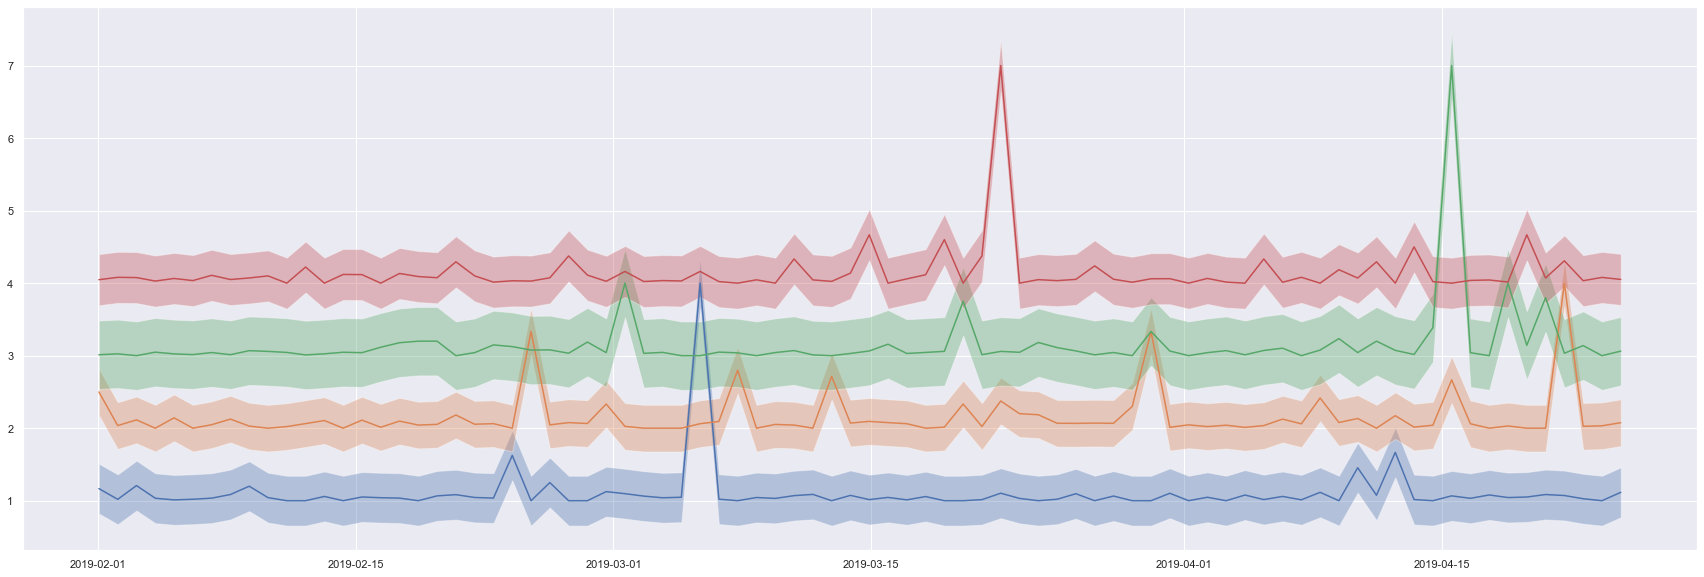

In [14]:
import csv
from datetime import datetime
import statistics

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

with open(filename, 'r') as f:
    reader = list(csv.DictReader(f))

    
dates = [datetime.strptime(d['datetime'], '%d/%m/%y %H:%M') for d in reader]
values  = [float(d['value1']) for d in reader]
statistics.stdev(values)
lons  = [float(d['lon']) for d in reader]
values1  = [float(d['value1']) for d in reader]
std1 = statistics.stdev(values1)

values2  = [float(d['value2']) for d in reader]
std2 = statistics.stdev(values2)

fig, ax = plt.subplots(figsize=(30, 10))

for value in ['value1', 'value2', 'value3', 'value4']:
    values  = [float(d[value]) for d in reader]
    std = statistics.stdev(values)
    ax.plot(dates, values)
    ax.fill_between(dates, [d-std for d in values], [d+std for d in values], alpha=0.35)

plt.show()